In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
df= pd.read_csv('dulieuxettuyendaihoc.csv', header=0,delimiter=',', encoding ='utf-8')
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [3]:
df=df[['T5','T6','NGONNGU']]

In [4]:
df.head(5)

,T5,T6,NGONNGU
0,7.4,6.9,3.25
1,3.0,4.0,6.00
2,4.8,5.7,5.00
3,6.1,7.4,4.25
4,6.8,8.0,4.25


In [ ]:
# # bài toán dự báo điểm T6 dựa trên T5
# input T5
# output T6
# T6 ở dạng số 
# nên dạng là dự báo PRediction
# T5 T6 có trong dữ liệu nên dùng kỹ thuạt học Giám sát(Nổi bật là LN , cao cấp hơn là ANN)(Supervited)
# mô hình LN đó có dạng  T6=A0+A1*T5+ epsilon(Mô hình tổng quát cần Tìm A0 và A1) 
# Modael là hồi quy tuyến tính: T6=A0+A1*T5+ épilon 
# dùng học máy để tìm A0 và A1 dựa trên dữ liệu lịch sử

In [6]:
df[['T5','T6']].corr()


# xác định độ tương quan xem độ tương quan có cao hay thấp >0 tương quan thuận và độ tương quan cao vì gần bằng1 . 

,T5,T6
T5,1.000000,0.778683
T6,0.778683,1.000000


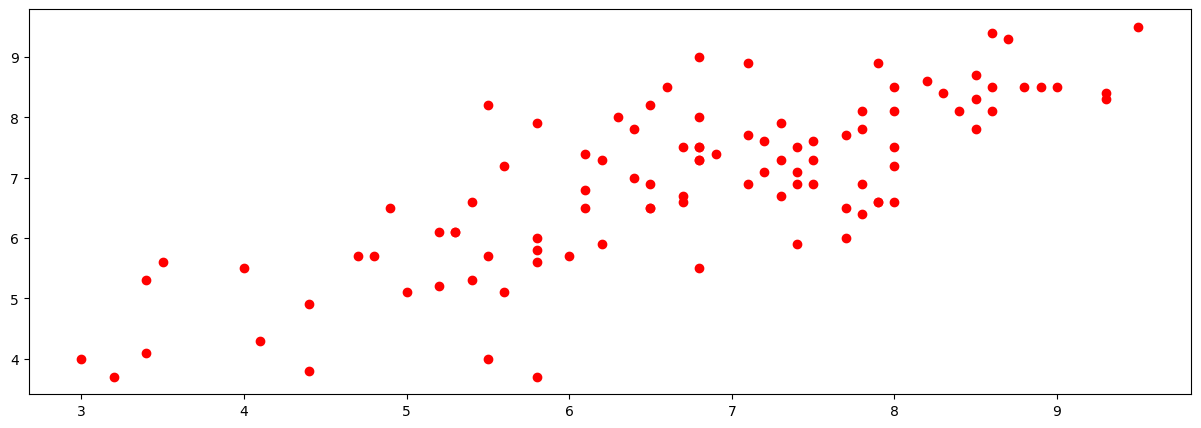

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df['T5'],df['T6'],'ro')
plt.show()
# dường như nó nằm trên một đường thẳng nào đó.


In [11]:
# có khả năng sd mô hình hồi quy tuyếntính
# input là x 
# output là y
# tập dữ liệu 
x=df[['T5']].values
y=df[['T6']].values
# chia tách ra trainning(tìm và huấn luyện) và testing(kiểm thử)
# test_size= 0.2 là lấy 20% ra đi kiểm thử
# ramdom_state=16 là ramdom dữ liệu xáo trộn dl, dùng chung gitrij thì sẽ xào nấu giống nhau 
# kết quả chạy theo 16, cắt giá trị giống thầy mặc dù ngẫu nhiên nhưng giống nhau
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2,random_state=16)
from sklearn import linear_model
model =linear_model.LinearRegression()
model.fit(x_train,y_train)
# sinh viên xác định gitrij tương ứng
# to retrieve the intercept
print(model.intercept_)
# for retrieving the slope
print(model.coef_)

[2.15188873]
[[0.71126425]]


In [ ]:
# T6= 2.15 + 0.71*T5 +E
# là một cái đường thẳng đi giữa các điểm 
# giá trị của out của phươgn trình dựa trên giá trị int đươcj gọi là dự báo 
# phần dư residucl là khoảng lệch giữa giá trị thưcj tế và giá trị dự báo 
# phần dư càng nhỏ thì dự báo càng chính xác 
# cách tính residucl = y mũ -y 
# y mũ là gtri thực tế 
# y là gitr dữ báo

In [12]:
# ví dụ Residul trong Excel 
pd.DataFrame(x_test).to_csv("input_test.csv")
pd.DataFrame(y_test).to_csv("output_test.csv")


In [17]:
import numpy as np
from sklearn import metrics
y_test_pred=model.predict(x_test)

print('Score or R-Squared', model.score(x_test,y_test))

print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test,y_test_pred))

print('Mean squared Error:',
      metrics.mean_squared_error(y_test,y_test_pred))

print('root mean squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

print('Mean Absolute percentage Error:',
      metrics.mean_absolute_percentage_error(y_test,y_test_pred))

Score or R-Squared 0.52486140058752
Mean Absolute Error: 0.7348517098271243
Mean squared Error: 0.9633910241687447
root mean squared Error: 0.9815248464347424
Mean Absolute percentage Error: 0.12159503916120847


In [18]:
# triển khai sản phẩm
# lưu mô hình xuống ổ đĩa dưới file sav là dạng nhị phân
import pickle
pickle.dump(model,open('model_line_regression.sav','wb'))

In [19]:
# cách đọc lại file
loaded_model= pickle.load(open('model_line_regression.sav','rb'))

vT5=float(input('Nhập T5: '))
predicted_T6 = loaded_model.predict([[vT5]])
print(f'Dự báo điểm T6 là : {predicted_T6}')

Dự báo điểm T6 là : [[7.4863706]]
